[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Decision Tree Accuracy: 0.7472527472527473
Random Forest Accuracy: 0.9120879120879121
SVM accuracy: 0.8021978021978022
Bernoulli Naive Bayes Accuracy: 0.7472527472527473
Gaussian Naive Bayes Accuracy: 0.7142857142857143


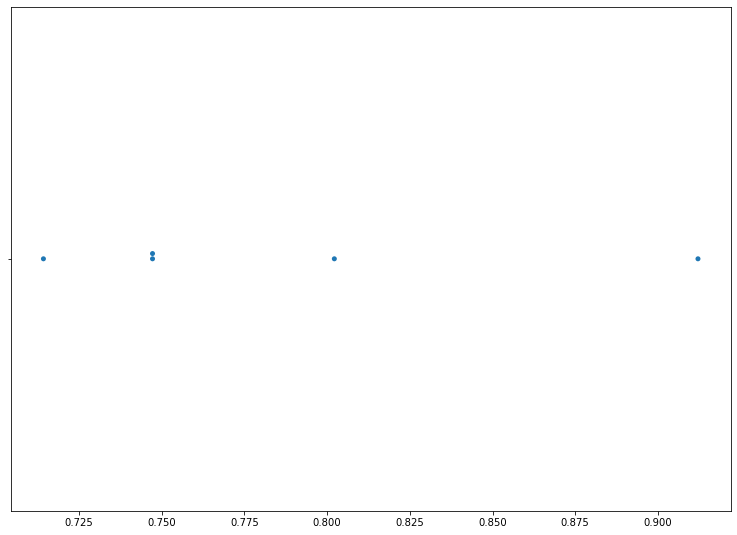

****Random Forest Model Evaluation****
Mean Absolute Error(MAE): 0.09
Accuracy: 91.21 %
Precision: 0.9433962264150944
Recall: 0.9090909090909091
F1: 0.9259259259259259
****Confusion Matrix****
[[33  3]
 [ 5 50]]


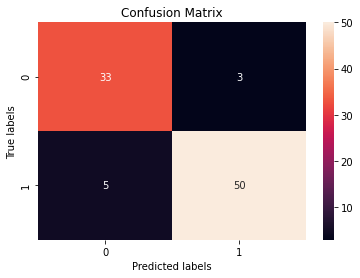

****AUC****
AUC:  0.9128787878787878
[[0.77 0.23]
 [0.69 0.31]
 [0.8  0.2 ]
 [0.32 0.68]
 [0.8  0.2 ]
 [0.46 0.54]
 [0.66 0.34]
 [0.78 0.22]
 [0.46 0.54]
 [0.26 0.74]
 [0.37 0.63]
 [0.45 0.55]
 [0.48 0.52]
 [0.42 0.58]
 [0.25 0.75]
 [0.26 0.74]
 [0.49 0.51]
 [0.23 0.77]
 [0.36 0.64]
 [0.7  0.3 ]
 [0.73 0.27]
 [0.36 0.64]
 [0.65 0.35]
 [0.74 0.26]
 [0.5  0.5 ]
 [0.32 0.68]
 [0.61 0.39]
 [0.57 0.43]
 [0.48 0.52]
 [0.61 0.39]
 [0.41 0.59]
 [0.4  0.6 ]
 [0.69 0.31]
 [0.81 0.19]
 [0.45 0.55]
 [0.17 0.83]
 [0.36 0.64]
 [0.7  0.3 ]
 [0.66 0.34]
 [0.62 0.38]
 [0.26 0.74]
 [0.49 0.51]
 [0.43 0.57]
 [0.67 0.33]
 [0.64 0.36]
 [0.68 0.32]
 [0.39 0.61]
 [0.26 0.74]
 [0.34 0.66]
 [0.42 0.58]
 [0.39 0.61]
 [0.31 0.69]
 [0.64 0.36]
 [0.79 0.21]
 [0.36 0.64]
 [0.45 0.55]
 [0.37 0.63]
 [0.48 0.52]
 [0.42 0.58]
 [0.21 0.79]
 [0.29 0.71]
 [0.23 0.77]
 [0.48 0.52]
 [0.73 0.27]
 [0.33 0.67]
 [0.73 0.27]
 [0.76 0.24]
 [0.87 0.13]
 [0.31 0.69]
 [0.58 0.42]
 [0.3  0.7 ]
 [0.79 0.21]
 [0.54 0.46]
 [0.81 0.19]
 

In [1]:
import numpy as np
import pandas as pd
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import textract
import PyPDF2
import os
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_auc_score, accuracy_score
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


PATHCV = "training_data/selected resumes/"
PATHNONCV = "training_data/rejected resumes/"
PKL_VECTOR = "model/resume_vector.pkl"
PKL_MODEL = "model/resume_classifier.pkl"
DIR_CV = 'training_data/selected resumes/'
DIR_NONCV = 'training_data/rejected resumes/'

lemmatizer = WordNetLemmatizer()
port = PorterStemmer()

#############Lemmatize/Stemminize######################
def lemmaStemma(text):
    return lemmatizer.lemmatize(text)

def read_All_CV(filename):
    text = textract.process(filename)
    return text.decode('utf-8')

def training_list(path):
    resume_list = []
    for r, d, f in os.walk(path):
        for file in f:
            if str(file).split(".")[-1].lower() == "pdf":
                f = open(path + file, "rb")
                pdfReader = PyPDF2.PdfFileReader(f)
                num_pages = pdfReader.numPages
                count = 0
                text = " "
                # The while loop will read each page
                while count < num_pages:
                    pageObj = pdfReader.getPage(count)
                    count += 1
                    text += pageObj.extractText()

                each_resume = " "
                # print(len(text))
                for j in range(len(text)):
                    each_resume += text[j]
                resume_list.append(each_resume)
            else:
                alltext = ' '
                word = read_All_CV(path + file)
                each_resume = " "
                for j in range(len(word)):
                    each_resume += word[j]
                resume_list.append(each_resume)
    return resume_list

#######################Model Evaluation##############
def evaluation(predictions, predictions_prob, test_labels):
    errors = abs(predictions - test_labels)
    print('Mean Absolute Error(MAE):', round(np.mean(errors), 2))

    """mape = 100 * (errors / test_labels)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%')"""
    print('Accuracy:', round(accuracy_score(test_labels, predictions) * 100, 2), '%')

    confusion = precision_recall_fscore_support(test_labels, predictions, average='binary')
    print('Precision:', confusion[0])
    print('Recall:', confusion[1])
    print('F1:', confusion[2])

    print("****Confusion Matrix****")
    cm = confusion_matrix(test_labels, predictions)
    print(cm)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)  # annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

    print("****AUC****")
    print('AUC: ', roc_auc_score(test_labels, predictions))


def main():
    resume_list = []
    listcv = training_list(PATHCV)
    listnoncv = training_list(PATHNONCV)
    resume_list = listcv + listnoncv

    # removing punctuations and other unnecessary characters
    for i in range(len(resume_list)):
        resume_list[i] = resume_list[i].translate(str.maketrans('','',string.punctuation))
        resume_list[i] = resume_list[i].translate(str.maketrans('','',"\n"))
        resume_list[i] = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', ' ', resume_list[i])
        resume_list[i] = lemmatizer.lemmatize(resume_list[i])
        resume_list[i] = port.stem(resume_list[i])

    #print(resume_list)

    # labelling the resumes as 1 and non resumes as 0
    label = []
    for i in range(len([name for name in os.listdir(DIR_CV) if os.path.isfile(os.path.join(DIR_CV, name))])):
        label.append(1)
    for i in range(len([name for name in os.listdir(DIR_NONCV) if os.path.isfile(os.path.join(DIR_NONCV, name))])):
        label.append(0)
    label = np.array(label)
    print(label)
    # shuffling and splitting the data into a training set and a testing set
    resumes_train, resumes_test, y_train, y_test = train_test_split(resume_list, label, stratify=label, test_size=0.33, random_state=42)

    # extracting words as features from the training and testing sets and making corresponding feature matrices
    vectorizer = TfidfVectorizer(analyzer="word", stop_words="english", max_features=250)
    features_train = vectorizer.fit_transform(resumes_train)
    X_train = features_train.toarray()
    features_test = vectorizer.fit_transform(resumes_test)
    X_test = features_test.toarray()


    # Using Decision Tree Classifier on the data
    dtclf = tree.DecisionTreeClassifier()
    dtclf = dtclf.fit(X_train, y_train)
    #print(dtclf.score(X_train, y_train))
    print("Decision Tree Accuracy: " + str(dtclf.score(X_test, y_test)))

    # Using Random Forest Classifier on the data
    rfclf = RandomForestClassifier()
    rfclf = rfclf.fit(X_train, y_train)
    #print(rfclf.score(X_train, y_train))
    print("Random Forest Accuracy: " + str(rfclf.score(X_test, y_test)))

    # Using SVM Classifier on the data
    model_svm = svm.SVC()
    model_svm = model_svm.fit(X_train, y_train)
    #print(model_svm.score(X_train, y_train))
    print("SVM accuracy: " + str(model_svm.score(X_test, y_test)))

    # Using Bernoulli Naive Bayes Algorithm
    bnbclf = BernoulliNB()
    bnbclf = bnbclf.fit(X_train, y_train)
    #print(bnbclf.score(X_train, y_train))
    print("Bernoulli Naive Bayes Accuracy: " + str(bnbclf.score(X_test, y_test)))

    # Using Gaussian Naive Bayes Algorithm
    gnbclf = GaussianNB()
    gnbclf = gnbclf.fit(X_train, y_train)
    #print(gnbclf.score(X_train, y_train))
    print("Gaussian Naive Bayes Accuracy: " + str(gnbclf.score(X_test, y_test)))
    
    
    data1 = dtclf.score(X_test, y_test)
    data2 = rfclf.score(X_test, y_test)
    data3 = model_svm.score(X_test, y_test)
    data4 = bnbclf.score(X_test, y_test)
    data5 = gnbclf.score(X_test, y_test)
    data = [data1, data2, data3, data4, data5]
    fig = plt.figure(figsize =(10, 7))
 
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    ax = sns.swarmplot(data)
    plt.show()
    
    

    print("****Random Forest Model Evaluation****")
    mnb_prediction = rfclf.predict(X_test)
    mnb_prob = rfclf.predict_proba(X_test)
    evaluation(mnb_prediction, mnb_prob, y_test)
    print(mnb_prob)

    #Save Vectorizer
    with open(PKL_VECTOR, 'wb') as file:
        pickle.dump(vectorizer, file)

    #Save Model
    with open(PKL_MODEL, 'wb') as file:
        pickle.dump(rfclf, file)


if __name__ == '__main__':
    main()

In [46]:
import pandas as pd

In [47]:
df1 = pd.read_csv("accuracies.csv")

In [48]:
df1

,Classifier Models,Accuracies
0,Decision Tree,0.74
1,Random Forest,0.91
2,SVM,0.80
3,Bernoulli NB,0.74
4,Multinomial NB,0.71
5,Decision Tree,0.68
6,Decision Tree,0.64
7,Decision Tree,0.71
8,Decision Tree,0.72
9,Random Forest,0.92


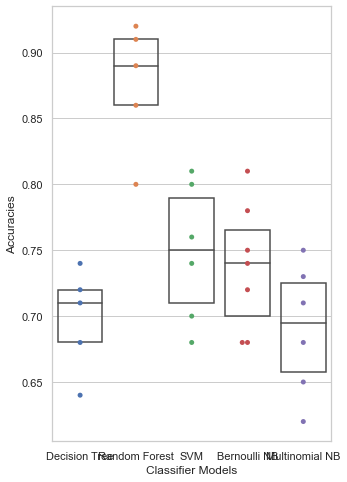

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
acc = pd.read_csv("accuracies.csv")
ax = sns.swarmplot(x="Classifier Models", y="Accuracies", data=acc)
ax = sns.boxplot(x="Classifier Models", y="Accuracies", data=acc,
        showcaps=False,boxprops={'facecolor':'None'},
        showfliers=False,whiskerprops={'linewidth':0})

plt.show()

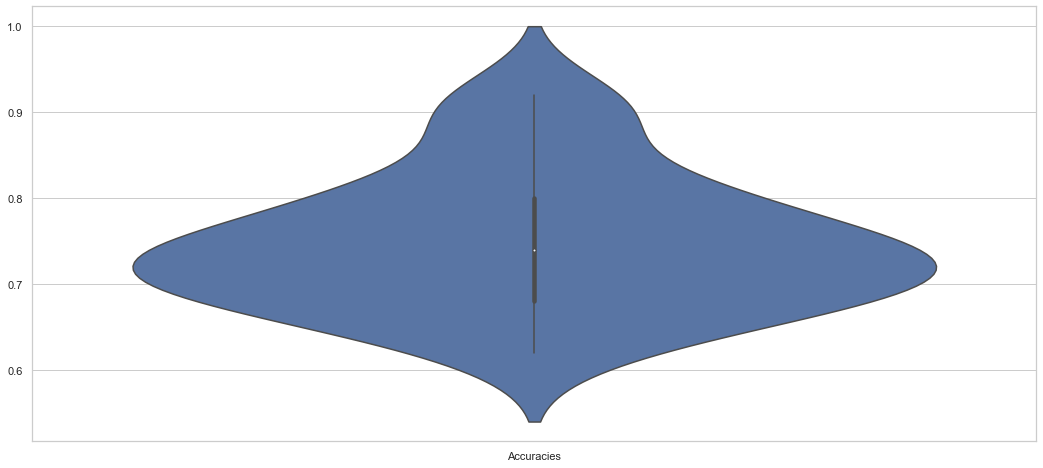

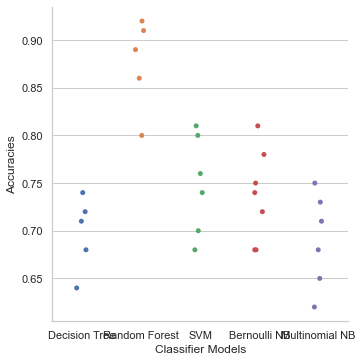

In [50]:
a4_dims = (18, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax, data=acc)

sns.catplot(x="Classifier Models", y="Accuracies",data=acc)

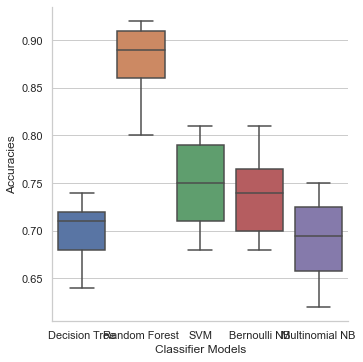

In [51]:
sns.catplot(x="Classifier Models", y="Accuracies", kind="box", data=acc)

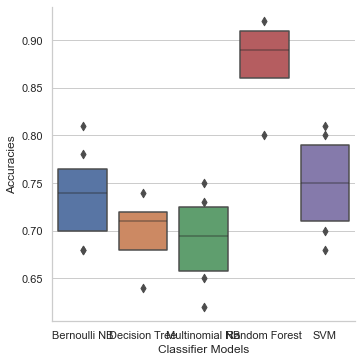

In [52]:
sns.catplot(x="Classifier Models", y="Accuracies", kind="boxen",
            data=acc.sort_values("Classifier Models"))

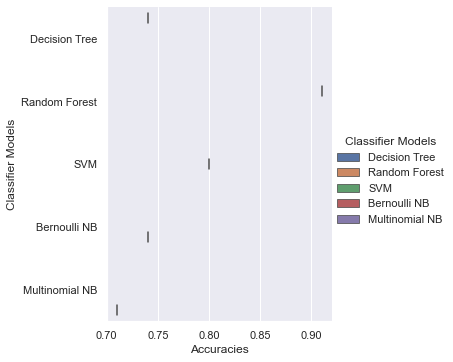

In [39]:
sns.catplot(x="Accuracies", y="Classifier Models", hue="Classifier Models",
            kind="violin", data=acc)

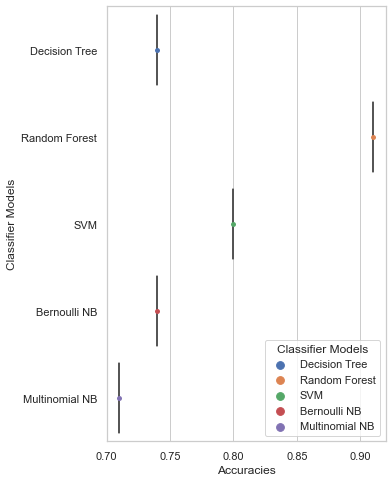

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
acc = pd.read_csv("accuracies.csv")
ax = sns.swarmplot(x="Accuracies", y="Classifier Models", hue = "Classifier Models",data=acc)
ax = sns.boxplot(x="Accuracies", y="Classifier Models",data=acc,
        showcaps=False,boxprops={'facecolor':'None'},
        showfliers=False,whiskerprops={'linewidth':0})

plt.show()